<a href="https://colab.research.google.com/github/mewan12/mewan12/blob/main/Salary_estimate-KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Day-4|Salary Estimation|K-NN model

In [1]:
!pip install pandas

In [22]:
import pandas as pd
import numpy as np

In [23]:
from google.colab import files
uploaded = files.upload()

Saving adult - Copy.csv to adult - Copy (1).csv


In [34]:
dataset = pd.read_csv('adult - Copy (1).csv')
dataset

,age,education.num,capita.gain,hours.per.week,incom
0,39,13,2174,40,<=50K
1,50,13,0,13,<=50K
2,38,9,0,40,<=50K
3,53,7,0,40,<=50K
4,28,13,0,40,<=50K
...,...,...,...,...,...
32556,27,12,0,38,<=50K
32557,40,9,0,40,>50K
32558,58,9,0,40,<=50K
32559,22,9,0,20,<=50K


In [35]:
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  capita.gain  hours.per.week   incom
0   39             13         2174              40   <=50K
1   50             13            0              13   <=50K
2   38              9            0              40   <=50K
3   53              7            0              40   <=50K
4   28             13            0              40   <=50K


In [36]:
dataset.dropna(how='any', inplace=True)
dataset

,age,education.num,capita.gain,hours.per.week,incom
0,39,13,2174,40,<=50K
1,50,13,0,13,<=50K
2,38,9,0,40,<=50K
3,53,7,0,40,<=50K
4,28,13,0,40,<=50K
...,...,...,...,...,...
32556,27,12,0,38,<=50K
32557,40,9,0,40,>50K
32558,58,9,0,40,<=50K
32559,22,9,0,20,<=50K


In [37]:
dataset['incom'] = dataset['incom'].replace({' <=50K': 0, ' >50K': 1})
print(dataset.head(20))

    age  education.num  capita.gain  hours.per.week  incom
0    39             13         2174              40      0
1    50             13            0              13      0
2    38              9            0              40      0
3    53              7            0              40      0
4    28             13            0              40      0
5    37             14            0              40      0
6    49              5            0              16      0
7    52              9            0              45      1
8    31             14        14084              50      1
9    42             13         5178              40      1
10   37             10            0              80      1
11   30             13            0              40      1
12   23             13            0              30      0
13   32             12            0              50      0
14   40             11            0              40      1
15   34              4            0              45     

In [39]:
X = dataset.iloc[:,:-1].values
X

array([[   39,    13,  2174,    40],
       [   50,    13,     0,    13],
       [   38,     9,     0,    40],
       ...,
       [   58,     9,     0,    40],
       [   22,     9,     0,    20],
       [   52,     9, 15024,    40]])

In [41]:
Y = dataset.iloc[:,-1].values
Y

array([0, 0, 0, ..., 0, 0, 1])

In [42]:
!pip install scikit-learn

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size =0.1,random_state=0)

In [49]:

X_test.shape

(3257, 4)

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.03919288, -2.36285263, -0.14560433, -0.0350423 ],
       [ 0.18102471,  1.52652496, -0.14560433,  0.77768384],
       [ 1.20870677,  1.91546272, -0.14560433,  1.18404692],
       ...,
       [-1.14028081, -0.02922608, -0.14560433, -0.0350423 ],
       [ 0.47464816,  2.30440048,  0.89355971,  0.37132077],
       [-0.99346908, -0.02922608,  0.20542442,  0.61513862]])

Finding Best K value

Text(0, 0.5, 'Mean Error')

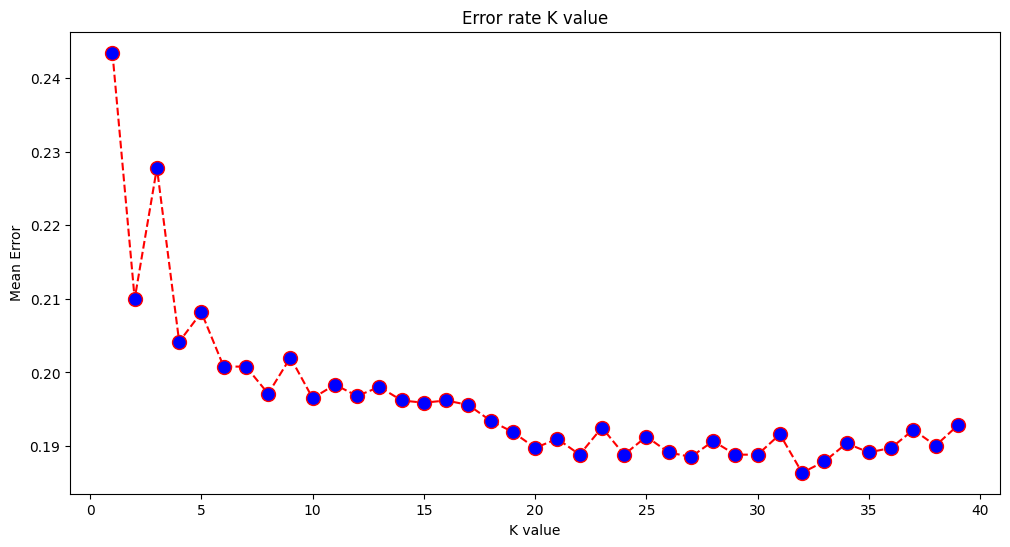

In [51]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1,40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  pred_i = model.predict(X_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',
         markerfacecolor='blue',markersize='10')

plt.title('Error rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

Training

In [61]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=8,metric='minkowski',p=2)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [62]:
y_pred = model.predict(X_test)

Evaluating model

In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)

print('confusion Matrix')
print(cm)

print("Accuracy of the model: {0}%".format(accuracy_score(y_test,y_pred)*100))

confusion Matrix
[[2278  162]
 [ 480  337]]
Accuracy of the model: 80.2886091495241%


Predicting for new customer

In [67]:
age = int(input("Enter age: "))
edu =int(input("Enter edu.num: "))
cg = int(input("Enter capital_gain: "))
wh = int(input("Enter wh: "))

newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print('New employee might got above 50k')
else:
  print('New employee might not got above 50k')

Enter age: 40
Enter edu.num: 11
Enter capital_gain: 0
Enter wh: 30
[0]
New employee might not got above 50k
